In [4]:
!pip install xarray netCDF4 cartopy

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ------ --------------------------------- 1.8/11.0 MB 9.8 MB/s eta 0:00:01
   ------------------ --------------------- 5.0/11.0 MB 12.0 MB/s eta 0:00:01
   --------------------------------- ------ 9.2/11.0 MB 14.6 MB/s eta 0:00:01
   ---------------------------------------  10.7/11.0 MB 15.6 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 12.3 MB/s  0:00:00
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------- ----------- 4.5/6.3 MB 23.7 MB/s eta 0:00:01
   ---------------------------------------- 6.3/6.3 MB 16.4 MB/s  0:00:00
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 14.3 MB/s  0:00:00

   ---------------------------------------- 0/4 [shapely]
   ---------------------------------------

In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import matplotlib.dates as mdates
import cartopy.feature as cfeature


['BASEFLOW', 'ECHANGE', 'EVLAND', 'EVPINTR', 'EVPSBLN', 'EVPSOIL', 'EVPTRNS', 'FRSAT', 'FRSNO', 'FRUNST', 'FRWLT', 'GHLAND', 'GRN', 'GWETPROF', 'GWETROOT', 'GWETTOP', 'LAI', 'LHLAND', 'LWLAND', 'PARDFLAND', 'PARDRLAND', 'PRECSNOLAND', 'PRECTOTLAND', 'PRMC', 'QINFIL', 'RUNOFF', 'RZMC', 'SFMC', 'SHLAND', 'SMLAND', 'SNODP', 'SNOMAS', 'SPLAND', 'SPSNOW', 'SPWATR', 'SWLAND', 'TELAND', 'TPSNOW', 'TSAT', 'TSOIL1', 'TSOIL2', 'TSOIL3', 'TSOIL4', 'TSOIL5', 'TSOIL6', 'TSURF', 'TUNST', 'TWLAND', 'TWLT', 'WCHANGE', 'Var_BASEFLOW', 'Var_ECHANGE', 'Var_EVLAND', 'Var_EVPINTR', 'Var_EVPSBLN', 'Var_EVPSOIL', 'Var_EVPTRNS', 'Var_FRSAT', 'Var_FRSNO', 'Var_FRUNST', 'Var_FRWLT', 'Var_GHLAND', 'Var_GRN', 'Var_GWETPROF', 'Var_GWETROOT', 'Var_GWETTOP', 'Var_LAI', 'Var_LHLAND', 'Var_LWLAND', 'Var_PARDFLAND', 'Var_PARDRLAND', 'Var_PRECSNOLAND', 'Var_PRECTOTLAND', 'Var_PRMC', 'Var_QINFIL', 'Var_RUNOFF', 'Var_RZMC', 'Var_SFMC', 'Var_SHLAND', 'Var_SMLAND', 'Var_SNODP', 'Var_SNOMAS', 'Var_SPLAND', 'Var_SPSNOW', 'Var

['BASEFLOW', 'ECHANGE', 'EVLAND', 'EVPINTR', 'EVPSBLN', 'EVPSOIL', 'EVPTRNS', 'FRSAT', 'FRSNO', 'FRUNST', 'FRWLT', 'GHLAND', 'GRN', 'GWETPROF', 'GWETROOT', 'GWETTOP', 'LAI', 'LHLAND', 'LWLAND', 'PARDFLAND', 'PARDRLAND', 'PRECSNOLAND', 'PRECTOTLAND', 'PRMC', 'QINFIL', 'RUNOFF', 'RZMC', 'SFMC', 'SHLAND', 'SMLAND', 'SNODP', 'SNOMAS', 'SPLAND', 'SPSNOW', 'SPWATR', 'SWLAND', 'TELAND', 'TPSNOW', 'TSAT', 'TSOIL1', 'TSOIL2', 'TSOIL3', 'TSOIL4', 'TSOIL5', 'TSOIL6', 'TSURF', 'TUNST', 'TWLAND', 'TWLT', 'WCHANGE', 'Var_BASEFLOW', 'Var_ECHANGE', 'Var_EVLAND', 'Var_EVPINTR', 'Var_EVPSBLN', 'Var_EVPSOIL', 'Var_EVPTRNS', 'Var_FRSAT', 'Var_FRSNO', 'Var_FRUNST', 'Var_FRWLT', 'Var_GHLAND', 'Var_GRN', 'Var_GWETPROF', 'Var_GWETROOT', 'Var_GWETTOP', 'Var_LAI', 'Var_LHLAND', 'Var_LWLAND', 'Var_PARDFLAND', 'Var_PARDRLAND', 'Var_PRECSNOLAND', 'Var_PRECTOTLAND', 'Var_PRMC', 'Var_QINFIL', 'Var_RUNOFF', 'Var_RZMC', 'Var_SFMC', 'Var_SHLAND', 'Var_SMLAND', 'Var_SNODP', 'Var_SNOMAS', 'Var_SPLAND', 'Var_SPSNOW', 'Var

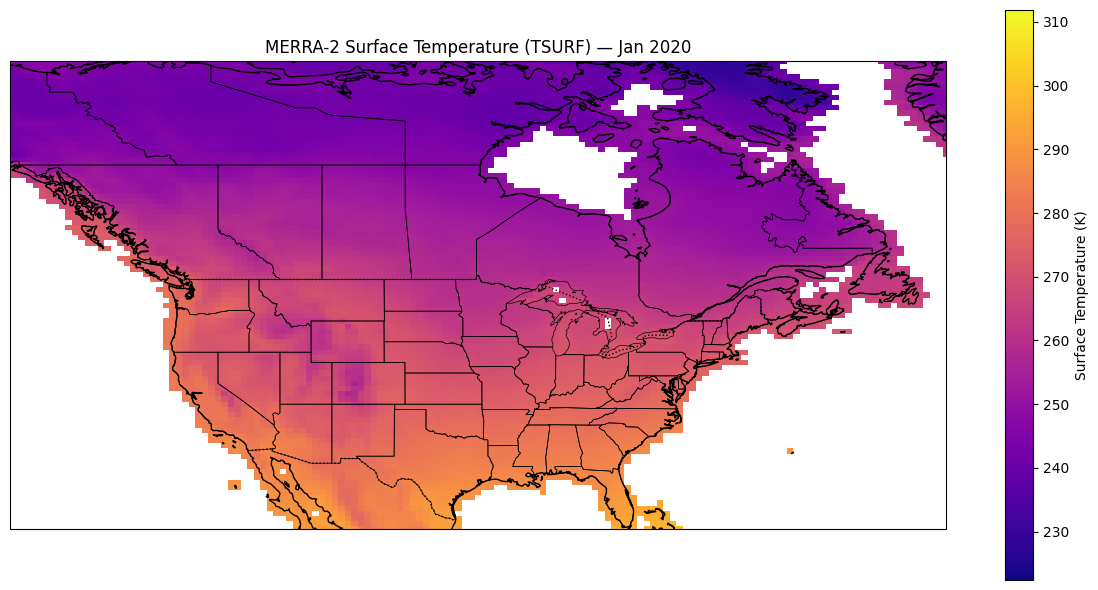

In [4]:
# This is an example plot. Good for presenting our midway findings. 

ds = xr.open_dataset("MERRA2_400.tavgM_2d_lnd_Nx.202001.nc4")
print(list(ds.data_vars.keys()))

tsurf = ds['TSURF']
tsurf_data = tsurf.isel(time=0)


plt.figure(figsize=(12, 6))

ax = plt.axes(projection=ccrs.PlateCarree())

tsurf_data.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='plasma',
    cbar_kwargs={'label': 'Surface Temperature (K)'}
)

ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linewidth=0.5)

#US and Canada coords
ax.set_extent([-140, -50, 25, 70], crs=ccrs.PlateCarree())

plt.title("MERRA-2 Surface Temperature (TSURF) — Jan 2020")
plt.tight_layout()
plt.show()



In [ ]:
import os
import xarray as xr

def get_tsurf(date_str, lon, lat, data_dir="./merra2_data"):
    year = date_str[:4]
    month = date_str[5:7]

    file_path = None
    for f in os.listdir(data_dir):
        if f.split('.')[2] == year + month:
            file_path = os.path.join(data_dir, f)
            break

    if file_path is None:
        raise FileNotFoundError(f"No MERRA2 file found for {date_str} in {data_dir}")

    print("Opening:", file_path)

    ds = xr.open_dataset(file_path)
    tsurf = ds['TSURF']

    # Normalize longitudes to 0–360 
    if ds.lon.min() < 0:
        ds = ds.assign_coords(lon=((ds.lon + 360) % 360))
        tsurf = ds['TSURF']

    ds = ds.sortby('lon')
    tsurf = ds['TSURF']

    # Convert input if it's negative. I think this might not be needed depending on how other nasa data is stored
    if lon < 0:
        lon = lon + 360

    nearest = tsurf.sel(lon=lon, lat=lat, method='nearest') #best way 

    tsurf_value = nearest.isel(time=0).values.item()

    ds.close()
    return tsurf_value


#example
tsurf_val = get_tsurf("1982-01", lon=-95.33, lat=29.76)
print(f"TSURF for 1982-01 at (-95.33, 29.76): {tsurf_val:.2f} K")


Opening: ./merra2_data\MERRA2_100.tavgM_2d_lnd_Nx.198201.nc4
Nearest gridpoint:
<xarray.DataArray 'TSURF' (time: 1)> Size: 4B
[1 values with dtype=float32]
Coordinates:
    lat      float64 8B 30.0
  * time     (time) datetime64[ns] 8B 1982-01-01T00:30:00
    lon      float64 8B 264.4
Attributes:
    long_name:       surface_temperature_of_land_incl_snow
    units:           K
    fmissing_value:  1000000000000000.0
    vmax:            1000000000000000.0
    vmin:            -1000000000000000.0
    valid_range:     [-1.e+15  1.e+15]
TSURF for 1982-01 at (-95.33, 29.76): 283.09 K
